Depedencies installation

In [1]:
%pip install pymupdf
%pip install KeyBERT
%pip install yake

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



Import Libraries

In [5]:
# Import widget
from IPython.display import Image as IPImage, display, HTML
from ipywidgets import interact, Select, SelectMultiple, HBox, VBox, interactive_output, widgets, Layout
import warnings

# Other
import glob, os, sys, re

# Local
import util

In [6]:
text_path = "../output/"
opt = ['text', 'metadata']

In [7]:
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    return content

In [8]:
def read_file(pdf_file, opt):
    global data_txt, content_txt, md_txt
    
    txt_path = text_path + "text/" + pdf_file
    md_path = text_path + "metadata/" + pdf_file
    
    content_txt = read_text_file(txt_path)
    md_txt = read_text_file(md_path)

    if (opt == "text"):
        data_text = content_txt
    else:
        data_text = md_txt
    display(widgets.HTML(data_text[:1500], raw=True))

pdf_list = [os.path.basename(file) for file in glob.iglob( text_path +'/text/*') if re.search(".+\.(txt)", os.path.basename(file))]

w1 = widgets.Select(options=pdf_list, value=pdf_list[0],rows=3, description='PDF File',disabled=False, layout=Layout(width='25%'))
w3 = widgets.Select(options=opt, value=opt[0],rows=3, description='Options',disabled=False, layout=Layout(width='15%'))
ui = HBox([w1, w3])
w_dict = {'pdf_file': w1, 'opt': w3}
out = interactive_output(read_file, w_dict)
display(ui, out)

Output()

Abstract Identifier

In [9]:
abs = util.abstract_extraction(content_txt)
abs

'— the ability to perform in-hand manipulation still remains an unsolved problem; having this capability would allow robots to perform sophisticated tasks requiring repositioning and reorienting of grasped objects. in this work, we present a novel non-anthropomorphic robot grasper with the ability to manipulate objects by means of active surfaces at the ﬁngertips. active surfaces are achieved by spherical rolling ﬁngertips with two degrees of freedom (dof) – a pivoting motion for surface reorientation – and a continuous rolling motion for moving the object. a further dof is in the base of each ﬁnger, allowing the ﬁngers to grasp objects over a range of size and shapes. instantaneous kinematics was derived and objects were successfully manipulated both with a custom handcrafted control scheme as well as one learned through imitation learning, in simulation and experimentally on the hardware. i. '

Metadata Extraction

In [10]:
md = util.metadata_extraction(md_txt)
title = md["title"]
title

'Design and Control of Roller Grasper V2 for In-Hand Manipulation'

Keyword Extraction

In [11]:
kw_all = util.keywords_extraction(content_txt)
kw_all

[('roller grasper', 0.6859),
 ('sophisticated object manipulation', 0.5594),
 ('handcrafted control', 0.5551),
 ('grasped objects', 0.4581),
 ('ﬁnger joint motions', 0.3847)]

In [12]:
kw_abs = util.keywords_extraction(abs)
kw_abs

[('robot grasper', 0.6916),
 ('handcrafted control', 0.5663),
 ('instantaneous kinematics', 0.5071),
 ('spherical rolling ﬁngertips', 0.4275),
 ('active surfaces', 0.3411)]

In [19]:
import matplotlib.pyplot as plt

def plot_keyword(title, label, score):
    plt.barh(label, score)
    plt.xlabel('Score')
    plt.ylabel('Keyword')
    plt.title(title)
    plt.show()

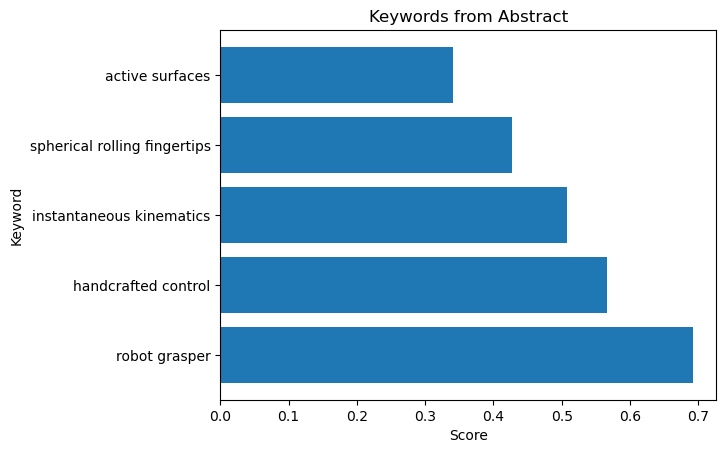

In [21]:
label = [i[0] for i in kw_abs]
score = [i[1] for i in kw_abs]
plot_keyword("Keywords from Abstract", label, score)

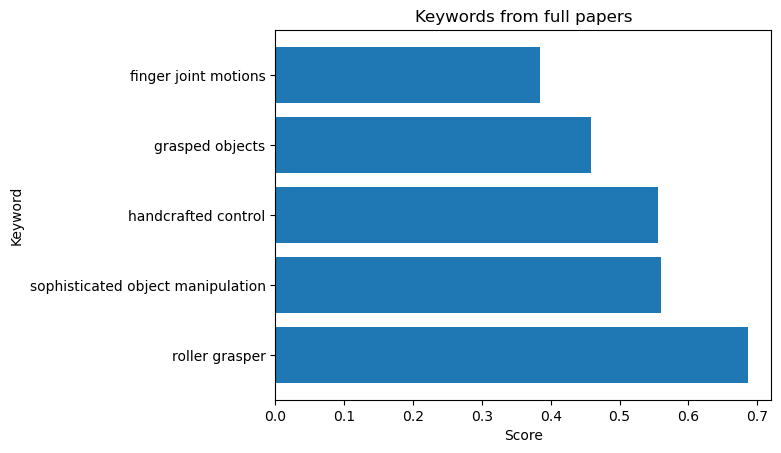

In [23]:
label = [i[0] for i in kw_all]
score = [i[1] for i in kw_all]
plot_keyword("Keywords from full papers", label, score)

Sentiment Analysis

In [25]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', top_k=None)
prediction = classifier(abs)
print(prediction)

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 1.12.1)
    Python  3.10.11 (you have 3.10.11)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


[[{'label': 'joy', 'score': 0.9610798954963684}, {'label': 'fear', 'score': 0.014207734726369381}, {'label': 'anger', 'score': 0.012819958850741386}, {'label': 'surprise', 'score': 0.006956023164093494}, {'label': 'sadness', 'score': 0.003981814254075289}, {'label': 'love', 'score': 0.000954503717366606}]]


In [26]:
chat = "Thank you all for your hard work on the MBO interviews. This is a business communication. First of all, please make corrections in CWS based on what you conducted and pointed out in the MBO interview. After that, please make it into an Excel file and send it to me and Ms. Ina by e-mail. I and Mr. Ina will check the file and point out any corrections. If there are no corrections, we will proceed with the status as is."
prediction = classifier(abs)
print(prediction)

[[{'label': 'joy', 'score': 0.9610798954963684}, {'label': 'fear', 'score': 0.014207734726369381}, {'label': 'anger', 'score': 0.012819958850741386}, {'label': 'surprise', 'score': 0.006956023164093494}, {'label': 'sadness', 'score': 0.003981814254075289}, {'label': 'love', 'score': 0.000954503717366606}]]


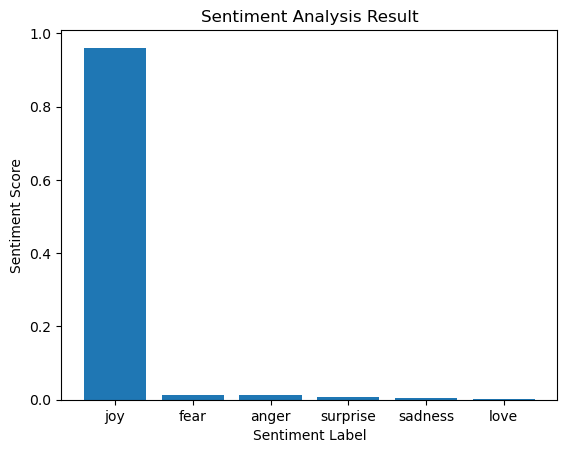

In [27]:
import matplotlib.pyplot as plt

label = [i["label"] for i in prediction[0]]
score = [i["score"] for i in prediction[0]]

def plot_sentiment(label, score):
    # Create a bar plot of the sentiment score
    plt.bar(label, score)
    plt.xlabel('Sentiment Label')
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Analysis Result')
    plt.show()

plot_sentiment(label, score)

Crossref

In [ ]:
crossref = util.crossref_search(title)
crossref

{'indexed': {'date-parts': [[2023, 6, 7]],
  'date-time': '2023-06-07T16:12:30Z',
  'timestamp': 1686154350659},
 'reference-count': 36,
 'publisher': 'IEEE',
 'license': [{'start': {'date-parts': [[2020, 10, 24]],
    'date-time': '2020-10-24T00:00:00Z',
    'timestamp': 1603497600000},
   'content-version': 'vor',
   'delay-in-days': 0,
   'URL': 'https://ieeexplore.ieee.org/Xplorehelp/downloads/license-information/IEEE.html'},
  {'start': {'date-parts': [[2020, 10, 24]],
    'date-time': '2020-10-24T00:00:00Z',
    'timestamp': 1603497600000},
   'content-version': 'stm-asf',
   'delay-in-days': 0,
   'URL': 'https://doi.org/10.15223/policy-029'},
  {'start': {'date-parts': [[2020, 10, 24]],
    'date-time': '2020-10-24T00:00:00Z',
    'timestamp': 1603497600000},
   'content-version': 'stm-asf',
   'delay-in-days': 0,
   'URL': 'https://doi.org/10.15223/policy-037'}],
 'content-domain': {'domain': [], 'crossmark-restriction': False},
 'published-print': {'date-parts': [[2020, 10, 2

In [ ]:
for ref in crossref["reference"]:
    print(ref["key"], ref.get("DOI", ""), ref.get("journal-title", ""))

ref33 10.1109/70.88036
ref32 10.1109/ROBOT.2009.5152385
ref31 10.1016/j.robot.2004.03.002
ref30 10.15607/RSS.2020.XVI.082
ref36 10.1007/s10851-009-0161-2
ref35 
ref34 
ref10 10.1115/1.4044163
ref11 10.1109/IROS.2012.6385939
ref12 10.1115/DETC2016-60354
ref13 10.1109/ICRA.2016.7487156
ref14 10.1177/0278364919887447
ref15 10.15607/RSS.2018.XIV.058
ref16 10.1109/IROS.2018.8594303
ref17 10.1109/IROS.2017.8206014
ref18 10.1109/AIM.2016.7576796
ref19 10.1109/ICRA.2017.7989394
ref28 
ref4 
ref27 
ref3 10.1109/ICRA.2011.5979830
ref6 
ref29 
ref5 10.1109/ICRA.2011.5980371
ref8 10.1177/0278364917694723
ref7 10.1177/0278364909360852
ref2 10.1146/annurev-control-060117-105003
ref9 10.1109/TRO.2016.2562122
ref1 10.1109/ICRA40945.2020.9197146
ref20 
ref22 10.1109/ICRA.2014.6907062
ref21 10.1109/ROBOT.1988.12056
ref24 10.1109/IROS.2015.7354264
ref23 10.1109/TRO.2017.2693391
ref26 10.1109/HUMANOIDS.2015.7363524
ref25 10.1177/0278364914559753
